# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


### reshape메서드에 대한 간단한 연습

In [2]:
a = np.array([[1,2, 3],[4, 5,6]])
print(a.shape)
print('\n')

# reshape메서드에서 -1을 쓰면 나머지 영역은 flatten하게 묶어서 하나의 차원으로 바꿈
a = a.reshape(3, -1)
print(a.shape)
print(a)

(2, 3)


(3, 2)
[[1 2]
 [3 4]
 [5 6]]


---

## Load Dataset
- MNIST dataset

(그냥 다운 받아도 되지만 보통 문서->user->.keras에서 데이터셋을 찾으면 됌)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape) # 6000개의 (28 x 28)크기 픽셀이미지
print(y_train.shape) # 6000개의 인식결과(훈련 데이터)

(60000, 28, 28)
(60000,)


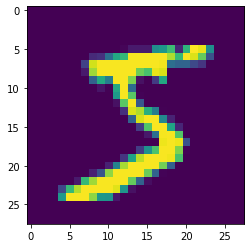

Label:  5


In [5]:
# train data(훈련 데이터)
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

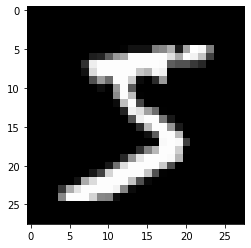

In [6]:
# train data(훈련 데이터)
plt.imshow(X_train[0], cmap='gray')

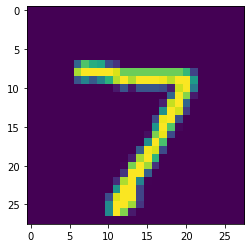

Label:  7


In [7]:
# train data(학습 데이터)
plt.imshow(X_test[0])    # show first number in the dataset X_test
plt.show()
print('Label: ', y_test[0])

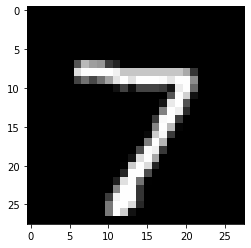

Label:  7


In [8]:
# train data(학습 데이터)
plt.imshow(X_test[0], cmap='gray')    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

---

In [24]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

#reshaping X data : (n,28,28) ---> (n,784)
X_train = X_train.reshape((X_train.shape[0], -1))  
X_test = X_test.reshape((X_test.shape[0], -1))

print('shape of X_train = ', X_train.shape)
print('\n')


# 밑에는 Tuple로 결과값을 받환받는 것!
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, 
                                           test_size = 0.67, 
                                           random_state = 7)

print('shape of X_train_splited = ', X_train.shape)
print(y_train)

shape of X_train =  (19800, 784)


shape of X_train_splited =  (6534, 784)
[9 5 3 ... 5 6 2]


In [25]:
# 이 셀은 run하면 계속 바뀌니까 한 번만 할 것!

# converting y data into categorical (<<<one-hot encoding>>>>)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# one-hot encoding 원리
# 0 -> 1 0 0
# 1 -> 0 1 0
# 2 -> 0 0 1

print(y_train)
print(y_train.shape)  # y_train의 value가 0~9까지 있어서 총 10개!

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(6534, 10)


In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6534, 784) (10000, 784) (6534, 10) (10000, 10)


---

# Basic MLP model

In [27]:
model = Sequential()

In [28]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### softmax 함수

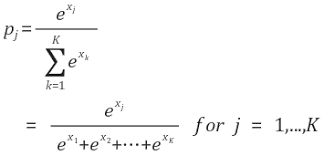

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

## Cross Entropy

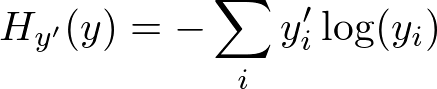

- y =  우리의 neural net이 예측한 정답 label의 값
- y' =  실제 정답 label의 값
- i = 분류하고자 하는 class의 개수 및 시그마의 인덱스

간혹 우리 neural net의 예측값이 0이거나 0과 가까운 매우 작은 숫자일 경우 log 뒤의 y(i)의 값은 무한대로 수렴하게 된다. (이해가 되지 않는다면 위 그래프에서 y가 0.00000000001일 때의 x값을 찾아보라)

여기서 무한대로 수렴한다는 것은 분명 유쾌한 일이 아니다.

그러므로 이런 경우를 대비해서 y(i)에 1e-07 ( 0.0000001 ) 정도를 더해준다. // y'log(y+0.0000001)

이렇게 하면 cost 값에는 크게 영향을 주지 않으면서 무한대의 만행을 어느정도 막아낼 수 있다.


출처: https://worthpreading.tistory.com/23 [Worth spreading]

In [30]:
# 모델을 학습시키기 이전에, compile 메소드를 통해서 학습 방식에 대한 환경설정을 해야 합니다.

sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감


model.compile(optimizer = sgd,
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [15]:
history = model.fit(X_train, y_train, 
                    batch_size = 256, 
                    validation_split = 0.3,   
                    epochs = 200, 
                    verbose = 0)

# 위에서 나뉘어진 X_train셋을 다시 0.7만 가지고 학습을 시키고 
# 나머지 0.3은 검증을 하는데 쓰임


In [16]:
print(history.history)

{'val_loss': [2.431025493506229, 2.404662131139325, 2.3846861189061945, 2.36886507461368, 2.35636790047591, 2.3462767690921873, 2.3379953024764655, 2.3314472558121087, 2.325958228512645, 2.3214876878141153, 2.317815408481893, 2.3146857152482876, 2.3121255120043, 2.31006495992744, 2.3082869813899802, 2.306761141337128, 2.3055594439458367, 2.304595878549698, 2.303686789470891, 2.3030205753917246, 2.3024176973285098, 2.3019368691877884, 2.301547140384764, 2.301252662453186, 2.301009523025667, 2.3007798339381362, 2.3006092960987026, 2.3004744109079893, 2.30036380732501, 2.3002677511285854, 2.3002209472335147, 2.300174057282984, 2.3001136028405393, 2.3000845059802635, 2.3000725662668144, 2.300051368206037, 2.3000254165443907, 2.3000097738773335, 2.299985722018412, 2.2999908129374185, 2.2999788796460185, 2.2999760788297814, 2.2999842284103034, 2.2999716236936525, 2.2999721348887743, 2.2999537817958227, 2.2999439090189306, 2.2999513243986702, 2.299939157505228, 2.299941510383529, 2.2999415005

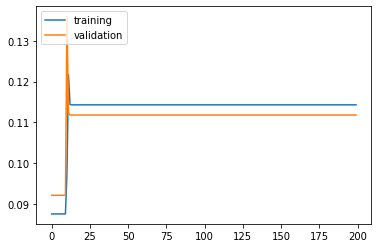

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [18]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/step


In [19]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


---

## 1. Weight Initialization

### Xavier
- **Standard deviation** = sqrt( 6 / (fan_in + fan_out))
- **Normal distribution** : N(0, sqrt(2. / (fan_in + fan_out)))

### HE
- **Standard deviation** = limit is sqrt( 6 / fan_in)
- **Normal distribution** : N(0, sqrt(2 / fan_in))
    
    
   

In [20]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [21]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

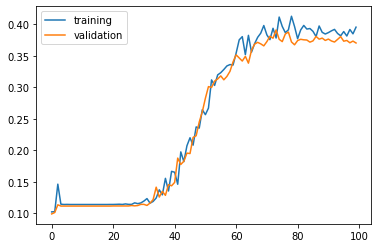

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [23]:
results = model.evaluate(X_test, y_test)

# loss값과 accuracy값을 리턴함
print(results)

10000/10000 [==============================] - 0s 20us/step
[2.0611085399627687, 0.3725000023841858]


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.3725000023841858


---

## 2. Nonlinearity (Activation function)
### 위의 예제에서 activate function을 relu로 바꿔보기

In [25]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('relu'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [26]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

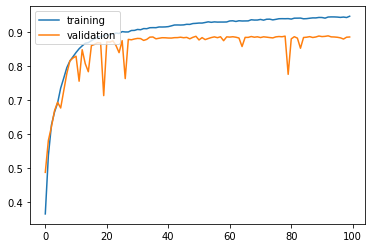

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

## 3. Optimizers

In [28]:
# 비록 sigmoid를 썼지만 adam을 썼기 때문에 결과가 좋음(밑의 그래프 참조)
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [29]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

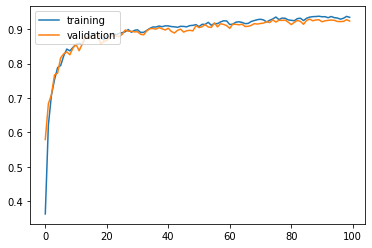

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [31]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/step


In [32]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9225000143051147


---

## 4. Batch Normalization

비선형 변환 전에 추가

In [33]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())  ## 이것만 추가   (배치는 activation 전에 한다.)
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())     #
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())       #
    model.add(Activation('sigmoid'))
    
    model.add(Dense(50))
    model.add(BatchNormalization())       #
    model.add(Activation('sigmoid'))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [34]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

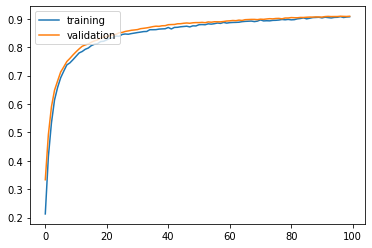

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [36]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 24us/step


In [37]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9103999733924866


---

## 5. Dropout (Regularization)

weight를 0으로 만들어주는 효과

In [38]:

# Droupout은 크게 잡는다.

def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                         # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [39]:
model = mlp_model()
history = model.fit(X_train, y_train, 
                    validation_split = 0.3, 
                    epochs = 100, 
                    verbose = 0)

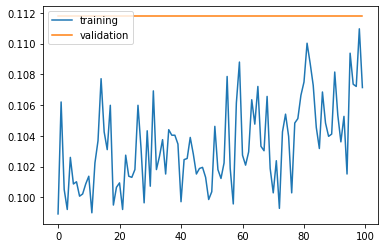

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [41]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 20us/step


In [42]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


---

## 6. Model Ensemble

In [43]:
# argmax : 최대값의 인덱스 리턴

print(np.max([1,2,3,4,1,8, 2.4]))
print(np.argmax([1,2,3,4,1,8, 2.4]))
print(np.argmax([1,0,0,0,0,0,0]))
print('\n')

label = [0,0,2,1]
x = np.array([[1,0,0],[1,0,0],[0,0,1],[0,1,0]])
print(np.argmax(x,axis=1))


8.0
5
0


[0 0 2 1]


In [10]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [11]:
print(y_train)
print(y_test)

[6 9 2 ... 5 5 3]
[7 2 1 ... 4 5 6]


In [12]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [13]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [14]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), 
                                              ('model2', model2), 
                                              ('model3', model3)], 
                                voting = 'soft')

In [15]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.3655 - accuracy: 0.1021
Epoch 2/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3117 - accuracy: 0.1039
Epoch 3/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3024 - accuracy: 0.1135
Epoch 4/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.3004 - accuracy: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2998 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2994 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2991 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2987 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 33us/step - loss: 2.2984 - accuracy: 0.1135
Epoch 10/100
19800/19800 [====================

19800/19800 [==============================] - 1s 34us/step - loss: 2.2832 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2828 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2823 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2818 - accuracy: 0.1135
Epoch 57/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2812 - accuracy: 0.1135
Epoch 58/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2807 - accuracy: 0.1135
Epoch 59/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2801 - accuracy: 0.1135
Epoch 60/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2795 - accuracy: 0.1135
Epoch 61/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2789 - accuracy: 0.1135
Epoch 62/100
19800/19800 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F76919D148>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F76919DA88>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F76919D188>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

---

# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [17]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [26]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 100)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 100)



In [27]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), 
                                              ('model2', model2), 
                                              ('model3', model3), 
                                              ('model4', model4), 
                                              ('model5', model5)], 
                                voting = 'soft')

In [28]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.7676 - accuracy: 0.7629
Epoch 2/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.4351 - accuracy: 0.8752
Epoch 3/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3672 - accuracy: 0.8946
Epoch 4/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.3217 - accuracy: 0.9076
Epoch 5/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.3009 - accuracy: 0.9145
Epoch 6/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.2813 - accuracy: 0.9194
Epoch 7/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.2689 - accuracy: 0.9246
Epoch 8/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.2601 - accuracy: 0.9262
Epoch 9/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2502 - accuracy: 0.9288
Epoch 10/100
60000/60000 [====================

60000/60000 [==============================] - 4s 65us/step - loss: 0.1601 - accuracy: 0.9536
Epoch 53/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1562 - accuracy: 0.9534
Epoch 54/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1595 - accuracy: 0.9534
Epoch 55/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1586 - accuracy: 0.9540
Epoch 56/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1571 - accuracy: 0.9555
Epoch 57/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1585 - accuracy: 0.9541
Epoch 58/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1592 - accuracy: 0.9544
Epoch 59/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1563 - accuracy: 0.9547
Epoch 60/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1550 - accuracy: 0.9549
Epoch 61/100
60000/60000 [========================

60000/60000 [==============================] - ETA: 0s - loss: 0.3249 - accuracy: 0.90 - 4s 68us/step - loss: 0.3244 - accuracy: 0.9081
Epoch 5/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2994 - accuracy: 0.9141
Epoch 6/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2814 - accuracy: 0.9192
Epoch 7/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2673 - accuracy: 0.9245
Epoch 8/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2540 - accuracy: 0.9270
Epoch 9/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2491 - accuracy: 0.9294
Epoch 10/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.2383 - accuracy: 0.9315
Epoch 11/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2334 - accuracy: 0.9344
Epoch 12/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.2241 - accuracy: 0.9348
Epoch 13/100


60000/60000 [==============================] - 4s 64us/step - loss: 0.1559 - accuracy: 0.9535
Epoch 57/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1548 - accuracy: 0.9551
Epoch 58/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.1579 - accuracy: 0.9542
Epoch 59/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1554 - accuracy: 0.9551
Epoch 60/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.1576 - accuracy: 0.9538
Epoch 61/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1577 - accuracy: 0.9541
Epoch 62/100
60000/60000 [==============================] - 4s 67us/step - loss: 0.1561 - accuracy: 0.9538
Epoch 63/100
60000/60000 [==============================] - 4s 66us/step - loss: 0.1570 - accuracy: 0.9530
Epoch 64/100
60000/60000 [==============================] - 4s 65us/step - loss: 0.1567 - accuracy: 0.9544
Epoch 65/100
60000/60000 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F765ADDB88>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F765AF51C8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F768AD8C48>),
                             ('model4',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F768AD8C88>),
                             ('model5',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001F765AF5108>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [24]:
y_pred = ensemble_clf.predict(X_test)

In [25]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9614
